In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = Ridge()

# 2. Setup Pipeline

In [5]:
pca=PCA()
SLR = Model_1

In [6]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [7]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()), ('SLR', Ridge())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.734):
{'SLR__alpha': 1000, 'pca__n_components': 150}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
79,0.124068,0.058890,0.008677,0.002188,1000,170,"{'SLR__alpha': 1000, 'pca__n_components': 170}",-0.652320,-0.629464,-1.019701,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
78,0.118084,0.044986,0.008776,0.000598,1000,150,"{'SLR__alpha': 1000, 'pca__n_components': 150}",-0.652320,-0.629464,-1.019701,-0.796638,-0.838327,-0.623856,-0.605852,-0.705903,-0.751369,-0.717822,-0.734125,0.119974,1
70,0.112203,0.041218,0.016154,0.025272,100,150,"{'SLR__alpha': 100, 'pca__n_components': 150}",-0.557192,-0.551972,-2.032064,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
71,0.110953,0.057263,0.014148,0.014515,100,170,"{'SLR__alpha': 100, 'pca__n_components': 170}",-0.557192,-0.551972,-2.032064,-0.668318,-0.719911,-0.566579,-0.569639,-0.613083,-0.671898,-0.616025,-0.756668,0.428507,3
55,0.091777,0.034584,0.015352,0.024544,8,170,"{'SLR__alpha': 8, 'pca__n_components': 170}",-0.513021,-0.547673,-2.281377,-0.619544,-0.686219,-0.546546,-0.564497,-0.565643,-0.640100,-0.603677,-0.756829,0.510501,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,0.055261,0.023787,0.012175,0.014927,2,5,"{'SLR__alpha': 2, 'pca__n_components': 5}",-1.161695,-1.116267,-1.238554,-1.418916,-1.446468,-0.989459,-1.198625,-1.113181,-1.209927,-1.140543,-1.203363,0.131918,84
72,0.066765,0.045978,0.008676,0.002445,1000,5,"{'SLR__alpha': 1000, 'pca__n_components': 5}",-1.166392,-1.123954,-1.245485,-1.463512,-1.462689,-0.957126,-1.221284,-1.135011,-1.205588,-1.103236,-1.208428,0.148248,85
16,0.106340,0.078735,0.008899,0.006183,0.2,5,"{'SLR__alpha': 0.2, 'pca__n_components': 5}",-1.158059,-1.156359,-1.242838,-1.443128,-1.495036,-0.967760,-1.197293,-1.118142,-1.215360,-1.121794,-1.211577,0.147415,86
64,0.059631,0.038004,0.006714,0.005439,100,5,"{'SLR__alpha': 100, 'pca__n_components': 5}",-1.151131,-1.122683,-1.267143,-1.496602,-1.454035,-0.964005,-1.211928,-1.127250,-1.203642,-1.131491,-1.212991,0.151502,87


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 1000, 'pca__n_components': 170}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [14]:
Model_2 = Ridge(alpha=best_alpha)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=100)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Ridge(alpha=1000)

In [17]:
pca2 = PCA(n_components=100)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.8962775047717084

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1105.7870989462353

# 5.1 Model using original sales data

In [22]:
Model_3 = Ridge(alpha=best_alpha)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Ridge(alpha=1000)

In [26]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(SLR2.predict(PX_test2),Y_test2)

1566.1555942663022

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

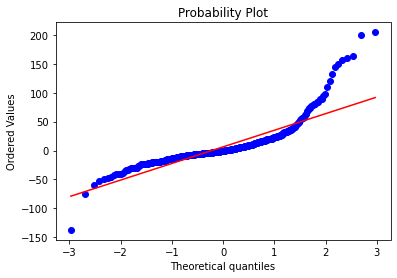

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

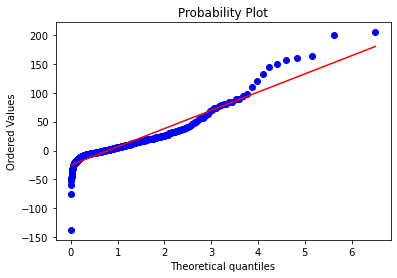

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

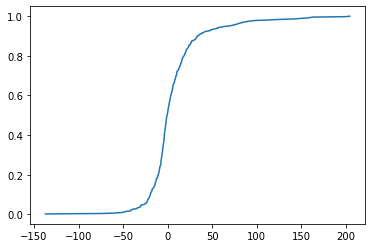

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

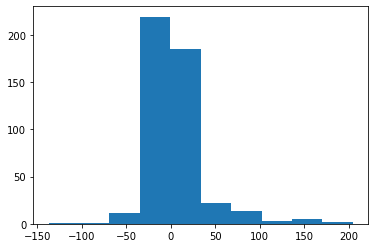

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

7.534651591997104

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [51]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

23512.0

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24404.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

23872.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

26360.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=Ridge(alpha=best_alpha)

In [53]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(SLR_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [54]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.065436,0.277532,-0.153275,0.214764,0.023046,0.184388,-0.246283,0.265568,0.260379,-0.036208,0.085535
Exponential,0.207230,0.275234,0.010368,0.252275,0.150685,0.217578,0.124898,0.228968,0.253848,0.144353,0.186544
Empirical,0.245892,0.315627,0.078452,0.286266,0.179210,0.276890,0.169172,0.277797,0.292949,0.184595,0.230685


In [55]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,2708.0,12560.0,-7096.0,10008.0,1144.0,7200.0,-12060.0,12248.0,11640.0,-1508.0,3684.4,8162.239977
Exponential,8576.0,12456.0,480.0,11756.0,7480.0,8496.0,6116.0,10560.0,11348.0,6012.0,8328.0,3399.272393
Empirical,10176.0,14284.0,3632.0,13340.0,8896.0,10812.0,8284.0,12812.0,13096.0,7688.0,10302.0,3111.901926
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [56]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,4979.859240
Dataset_2,1604.725400
Dataset_3,7872.775062
Dataset_4,2752.592892
Dataset_5,4889.767666
Dataset_6,2475.997624
Dataset_7,13327.934491
Dataset_8,1479.917374
Dataset_9,1755.713457
Dataset_10,5186.958477


In [57]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  4632.6241682192685


In [58]:
name = "2.3_Lin_reg_ridge.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [59]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")